Code adapted from https://www.youtube.com/watch?v=ZLIPkmmDJAc&t=2073s. 
I had to covert all of the common voice files since they are the only data service that saves in MP3. After that I picked a bunch of random files from common voice and mixed them in with fold1 of urban sound.

Origninally I only mixed in verfied files from common voice but it appears in this late night iteration I accidently mixed in unverified samples which is probably what led to some issues in EDA

In [5]:
! pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.0 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.27.0
    Uninstalling tensorflow-io-gcs-filesystem-0.27.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.27.0


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
#import tensorflow_io as tfio #I could not get tfio running on Juypter

In [2]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
from pydub import AudioSegment

The funciton below converts mp3s to wav files. Most audio processing libries use Wav files and common voice files are mp3s

In [40]:
import os

def convert_mp3_folder_to_wav(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".mp3"):
            # Build paths for input and output files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name[:-4] + ".wav")

            # Convert MP3 to WAV
            convert_mp3_to_wav(input_path, output_path)

In [41]:
convert_mp3_folder_to_wav("/Users/sheilalong/Desktop/p_test/data/clips", "/Users/sheilalong/Desktop/p_test/data/clipwav")


The following code loads in and normalizes wave files using the librosa library 

In [52]:
def load_wav_16k_mono_librosa(filename):
    # Convert tensor to string
    filename_str = filename.numpy().decode('utf-8')
    
    # Load audio file
    y, sr = librosa.load(filename_str, sr=16000, mono=True)
   # Normalize audio signal
    y_norm = librosa.util.normalize(y)
    return y_norm

In [62]:
THRONGLER_CPU = os.path.join('/Users/sheilalong/Downloads/lemaster_tech.wav')
THRONGLER_Phone = os.path.join('data', '21', '2023_02_21_16_43_36(1).wav')
#NOT_THRONGLER_MP3 = os.path.join('data', 'clips', 'common_voice_en_34925857.mp3')

In [63]:
# Load audio files as mono 16kHz WAV format
wave = load_wav_16k_mono_librosa(NOT_THRONGLER)  # loads a 16kHz mono WAV audio file called NOT_THRONGLER
nwave = load_wav_16k_mono_librosa(THRONGLER)    # loads a 16kHz mono WAV audio file called THRONGLER

### Normalizing an audio signal means scaling its amplitude values so that they are within a specified range. The purpose of normalization is to ensure that the signal's     amplitude is consistent and does not clip or distort when played or processed.

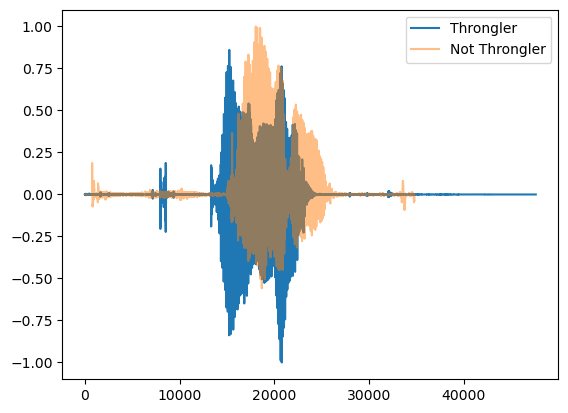

In [64]:
# Plot the two waves with labels
plt.plot(wave, label='Throngler')
plt.plot(nwave, label='Not Throngler', alpha = 0.5)

# Display the legend
plt.legend()

# Show the plot
plt.show()

The following code mixes random clips from common voice in with fold1 of the urban sounds dataset 

In [45]:
import os
import random
import shutil

def select_files_and_copy(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Select 2000 random files from clipwav folder
    clipwav_folder = os.path.join(input_folder, "clipwav")
    clipwav_files = [f for f in os.listdir(clipwav_folder) if f.endswith(".wav")]
    random_files = random.sample(clipwav_files, k=2000)

    # Copy random files to output folder
    for file_name in random_files:
        source_path = os.path.join(clipwav_folder, file_name)
        dest_path = os.path.join(output_folder, file_name)
        shutil.copy(source_path, dest_path)

    # Copy all files from fold1 folder to output folder
    fold1_folder = os.path.join(input_folder, "fold1")
    for file_name in os.listdir(fold1_folder):
        source_path = os.path.join(fold1_folder, file_name)
        dest_path = os.path.join(output_folder, file_name)
        shutil.copy(source_path, dest_path)


In [ ]:
select_files_and_copy(input_folder, output_folder)